In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

### References
##### https://www.kaggle.com/code/ash316/ml-from-scratch-with-iris/notebook
##### https://thatascience.com/learn-machine-learning/build-logistic-regression/

## Data Exploration

In [25]:
iris = load_iris()
iris_data = iris.data

In [26]:
dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
dataset['Species'] = iris.target

In [27]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


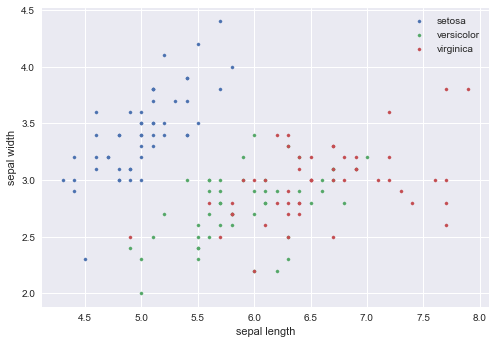

In [28]:
if __name__ == "__main__":
    data = dataset[0:150]
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    setosa = data.loc[y == 0]

    versicolor = data.loc[y == 1]
    
    virginica = data.loc[y == 2]

    plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], s=10, label='setosa')
    plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], s=10, label='versicolor')
    plt.scatter(virginica.iloc[:, 0], virginica.iloc[:, 1], s=10, label='virginica')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend()
    plt.style.use('seaborn')
    plt.show()

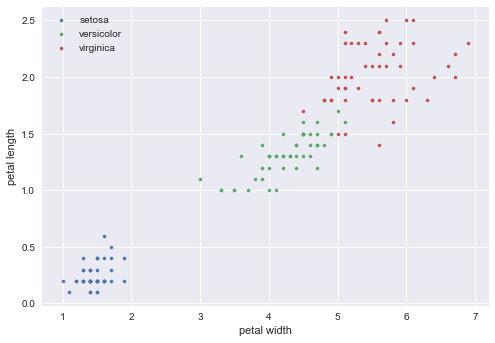

In [29]:
if __name__ == "__main__":
    data = dataset[0:150]
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    setosa = data.loc[y == 0]

    versicolor = data.loc[y == 1]
    
    virginica = data.loc[y == 2]

    plt.scatter(setosa.iloc[:, 2], setosa.iloc[:, 3], s=10, label='setosa')
    plt.scatter(versicolor.iloc[:, 2], versicolor.iloc[:, 3], s=10, label='versicolor')
    plt.scatter(virginica.iloc[:, 2], virginica.iloc[:, 3], s=10, label='virginica')
    plt.xlabel('petal width')
    plt.ylabel('petal length')
    plt.legend()
    plt.style.use('seaborn')
    plt.show()

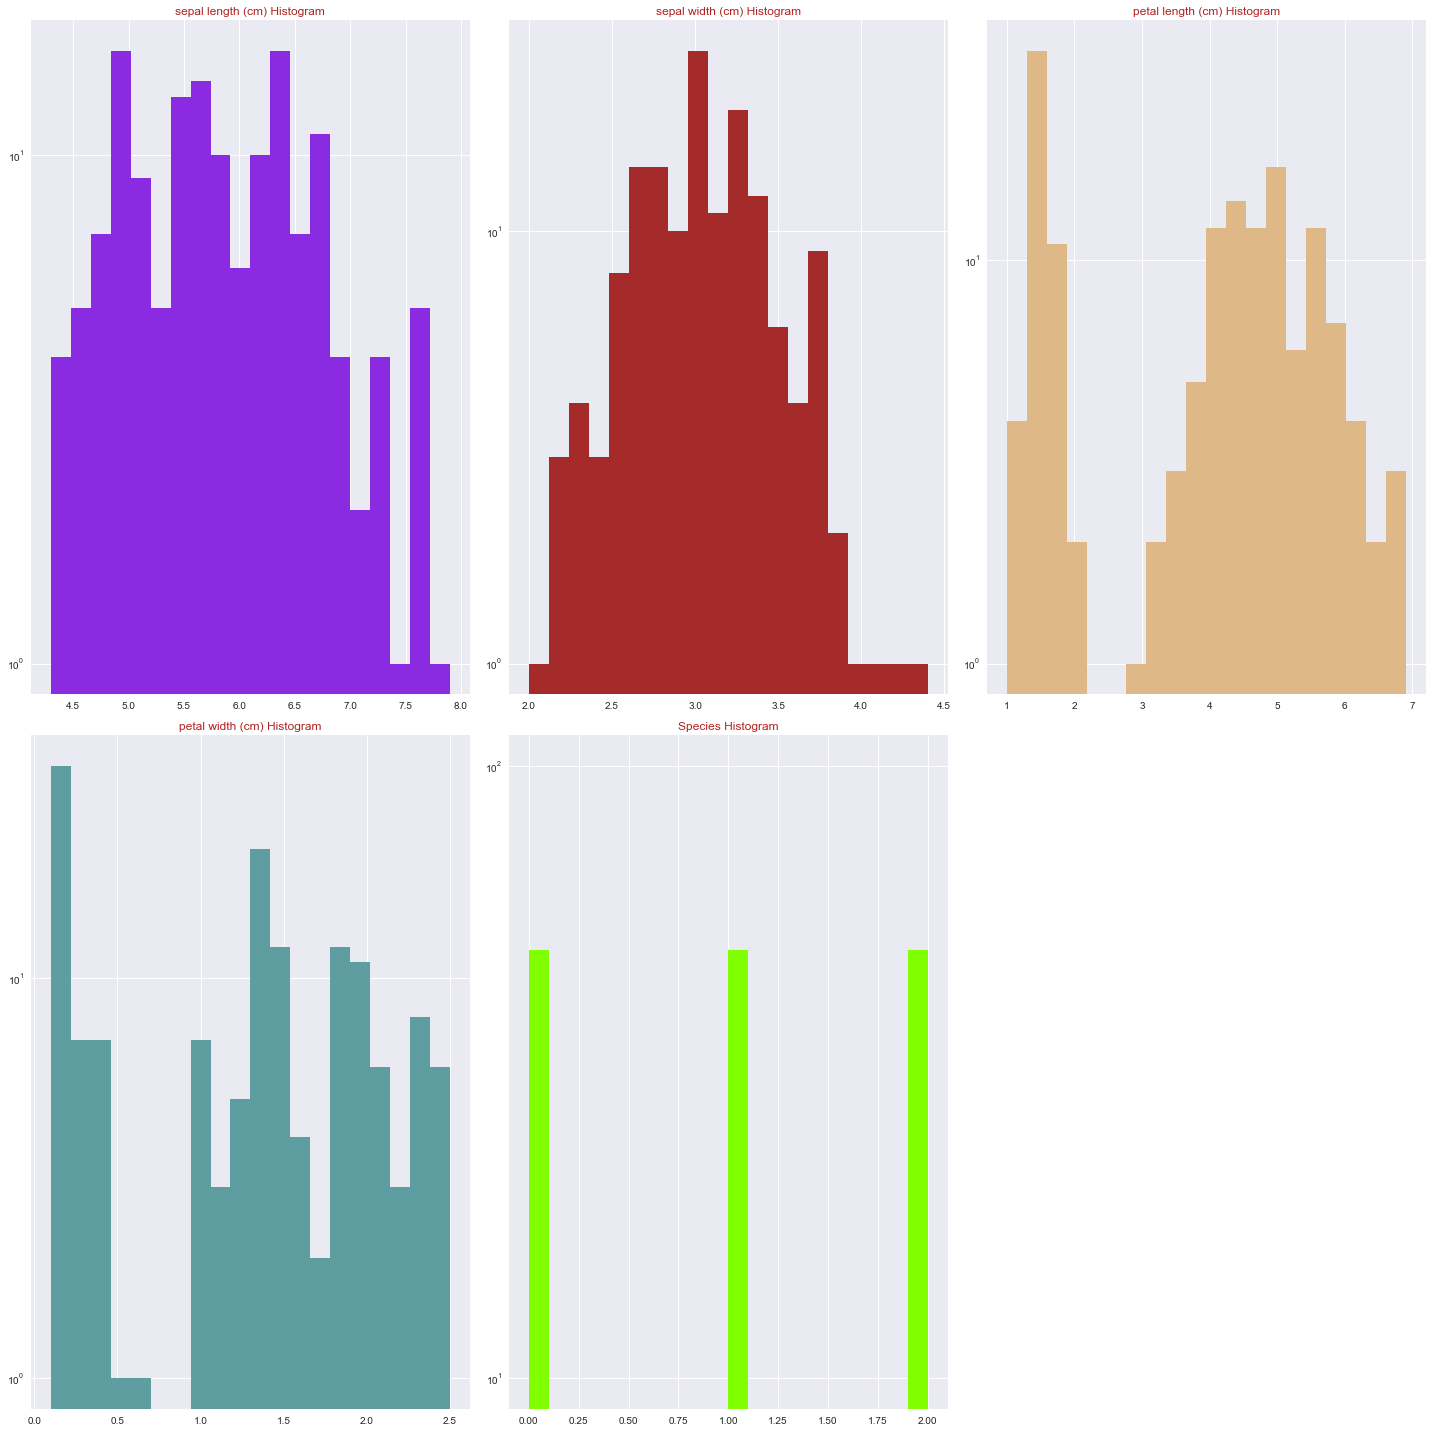

In [30]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.show()
draw_histograms(dataset,dataset.columns,2,3)

<AxesSubplot:xlabel='Species', ylabel='petal width (cm)'>

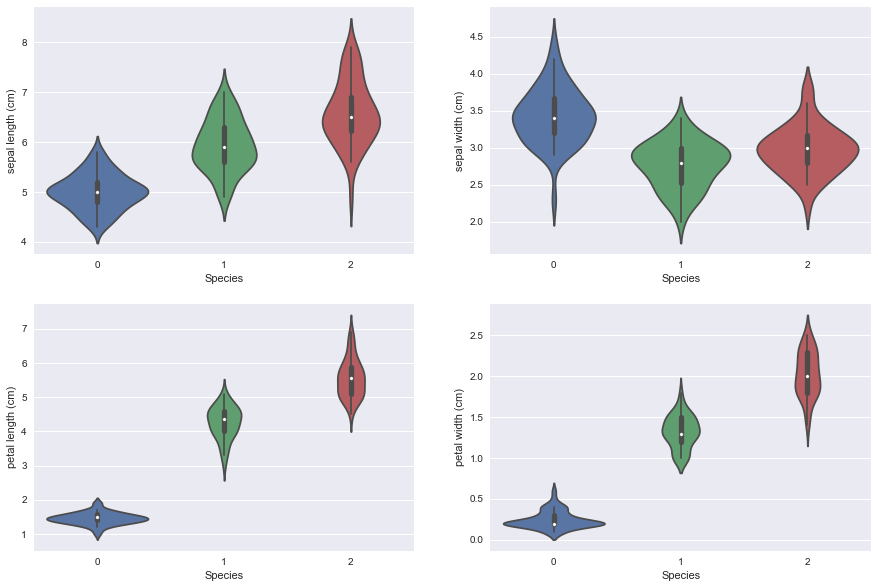

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='sepal length (cm)',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='sepal width (cm)',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='petal length (cm)',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='petal width (cm)',data=dataset)

## Data Processing

In [32]:
X = dataset.iloc[:,dataset.columns != 'Species']
y = dataset.Species

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=0, stratify=y)

In [34]:
X_train.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
45,4.8,3.0,1.4,0.3
1,4.9,3.0,1.4,0.2
38,4.4,3.0,1.3,0.2
7,5.0,3.4,1.5,0.2
82,5.8,2.7,3.9,1.2


In [35]:
y_train.head(5)

45    0
1     0
38    0
7     0
82    1
Name: Species, dtype: int32

In [36]:
X_test.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
36,5.5,3.5,1.3,0.2
55,5.7,2.8,4.5,1.3
44,5.1,3.8,1.9,0.4
134,6.1,2.6,5.6,1.4
39,5.1,3.4,1.5,0.2


In [37]:
y_test.head(5)

36     0
55     1
44     0
134    2
39     0
Name: Species, dtype: int32

In [38]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

## Model

In [39]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [41]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 95.0


In [42]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 96.66666666666667


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



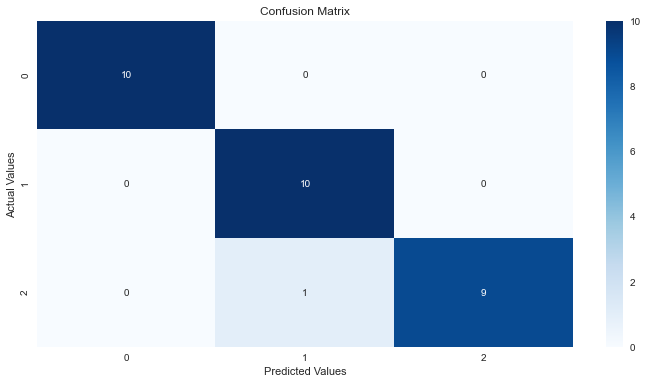

In [44]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

## Classifier

In [45]:
print(dataset.to_string())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  Species
0                  5.1               3.5                1.4               0.2        0
1                  4.9               3.0                1.4               0.2        0
2                  4.7               3.2                1.3               0.2        0
3                  4.6               3.1                1.5               0.2        0
4                  5.0               3.6                1.4               0.2        0
5                  5.4               3.9                1.7               0.4        0
6                  4.6               3.4                1.4               0.3        0
7                  5.0               3.4                1.5               0.2        0
8                  4.4               2.9                1.4               0.2        0
9                  4.9               3.1                1.5               0.1        0
10                 5.4               3.7   

In [46]:
y_class = model.predict(scaler.transform(pd.DataFrame([[5.1, 3.7, 1.5, 0.4]])))
if y_class >= 1:
    if y_class == 1:
        print('versicolor')
    else:
        print('virginica')
else:
    print('setosa')

setosa
